<a href="https://colab.research.google.com/github/Fowzia10/ETE456/blob/main/Copy_of_Copy_of_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHITTAGONG UNIVERSITY OF ENGINEERING AND TECHNOLOGY**

**Name: Fowzia Hossain**

**ID :1608010**

**Course No.: ETE 456** 

**Objective:**

1. finding diabetes possibility from given dataset

**we use filterwarnings() function to supress warnings**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Imported numpy pandas and matlab library**

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Download the data
!wget -O diabetes.csv https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 13:43:02--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 13:43:03--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4c57018eee70667c17d9dfa8ea.dl.dropboxusercontent.com/cd/0/inline/BcNXdqZo_GAzxh1aPA-bEExwAJ-jF0gTP1Eg9_xZHVJTn-cHLY-AsDjA8n9CwHvKdnn7J5YWHzeh5GdhMtRSu9xapdC7oyLvWqpRHuwFTxkpMS517RJ7XmefflQKgKN90q0ptn0h8RIMiKFcl9aGJQ_k/file# [following]
--2021-12-20 13:43:03--  https://uc4c57018eee70667c17d9dfa8ea.dl.dropboxusercontent.com/cd/0/inline/BcNXdqZo_GAzxh1aPA-bEExwAJ-jF0gTP1Eg9_xZHVJTn-cHLY-AsDjA8n9CwHvKdnn7J5YWHzeh5GdhMt

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
feature = dataset[['Glucose','Insulin']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [ ]:
feature

,Glucose,Insulin
0,148,0
1,85,0
2,183,0
3,89,94
4,137,168
...,...,...
763,101,180
764,122,0
765,121,112
766,126,0


In [ ]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 2)
(154, 2)


In [ ]:
X_test

,Glucose,Insulin
661,199,0
122,107,100
113,76,0
14,166,175
529,111,0
...,...,...
476,105,191
482,85,49
230,142,0
527,116,105


Feature scaling

In [ ]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#built the neural network architecture
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 1s 17ms/step - loss: 0.7147 - accuracy: 0.5308 - val_loss: 0.7076 - val_accuracy: 0.5968
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.6431 - val_loss: 0.6917 - val_accuracy: 0.6613
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.6812 - val_loss: 0.6788 - val_accuracy: 0.7419
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.6902 - val_loss: 0.6673 - val_accuracy: 0.7419
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.7011 - val_loss: 0.6552 - val_accuracy: 0.7097
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.7029 - val_loss: 0.6417 - val_accuracy: 0.7097
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6452 - accuracy: 0.7156 - val_loss: 0.6268 - val_accuracy: 0.7097
Epoch 8/100


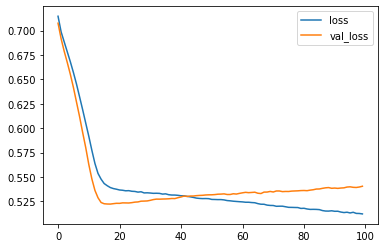

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

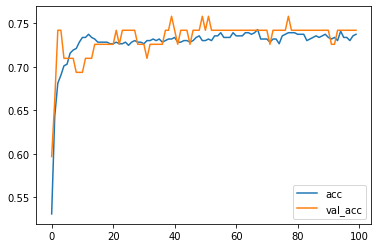

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [ ]:
#Prediction
y_pred = model.predict(X_test)

In [ ]:
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
476,1
482,0
230,1
527,0


In [ ]:
y_pred

array([[0.8883137 ],
       [0.1524198 ],
       [0.06618446],
       [0.83680236],
       [0.29667962],
       [0.08617336],
       [0.7289977 ],
       [0.8754136 ],
       [0.3347174 ],
       [0.22676992],
       [0.74660134],
       [0.9296987 ],
       [0.32673484],
       [0.14771754],
       [0.06543681],
       [0.26670405],
       [0.871671  ],
       [0.06328151],
       [0.4742621 ],
       [0.118191  ],
       [0.52804005],
       [0.3690958 ],
       [0.10524416],
       [0.06653991],
       [0.16964144],
       [0.4254334 ],
       [0.22898895],
       [0.7265434 ],
       [0.30652058],
       [0.28702384],
       [0.5042039 ],
       [0.12490737],
       [0.13807374],
       [0.28484553],
       [0.297769  ],
       [0.7597047 ],
       [0.51068145],
       [0.23013109],
       [0.27057254],
       [0.8364005 ],
       [0.21648929],
       [0.12146223],
       [0.11545545],
       [0.87032104],
       [0.8901193 ],
       [0.21006963],
       [0.17207772],
       [0.337

In [ ]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [ ]:
pred = y_pred.astype('uint8')
pred

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
from sklearn.metrics import classification_report
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154



Classification


In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Download the data
!wget -O diabetes.csv https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 13:43:42--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 13:43:42--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6af96ad063fb1e00a72c39452e.dl.dropboxusercontent.com/cd/0/inline/BcO0tOMleWp7sNquXhtOFj94K2j6vqNVP0yEAGLEISZHM8n7via3lXV1QcS9YDDvFvAitHEek9HvdA8ZK67bFVGtTpSSD5B9bz0qO7PTeW44gzSQso3ra4CzVKSmxe9Q70uplTLdSJYlSZ6UXmS-jvx8/file# [following]
--2021-12-20 13:43:43--  https://uc6af96ad063fb1e00a72c39452e.dl.dropboxusercontent.com/cd/0/inline/BcO0tOMleWp7sNquXhtOFj94K2j6vqNVP0yEAGLEISZHM8n7via3lXV1QcS9YDDvFvAitHEek9HvdA8ZK6

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Klib is an easy-to-use Python library for data cleaning, preprocessing, and visualization. It is an open-source library that helps in data analysis**.

In [ ]:
! pip install klib

In [ ]:
import klib

In [ ]:
klib.corr_mat(dataset) # returns a color-encoded correlation matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


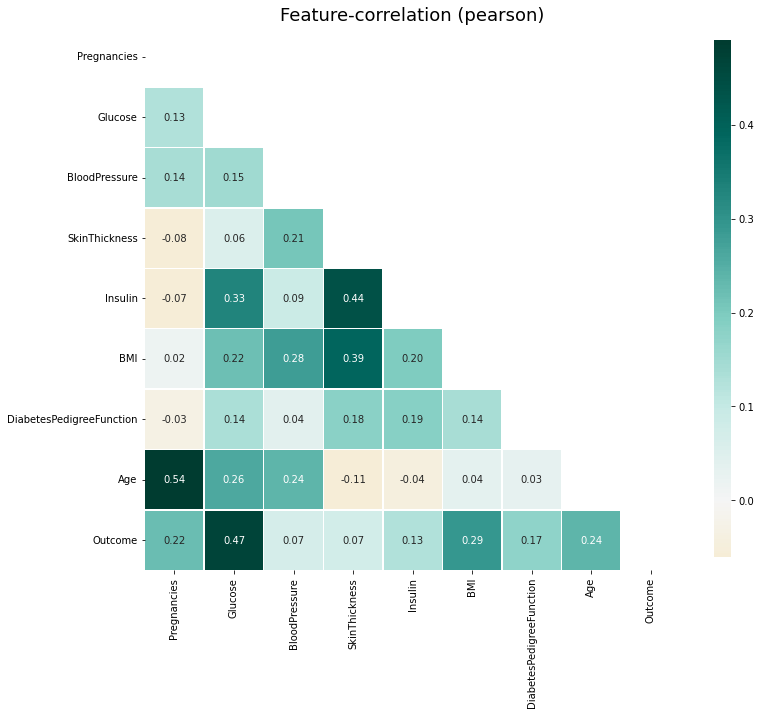

In [ ]:
klib.corr_plot(dataset)

In [ ]:
feature = dataset[['Glucose','Insulin','BMI','Age']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [ ]:
feature

,Glucose,Insulin,BMI,Age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33
...,...,...,...,...
763,101,180,32.9,63
764,122,0,36.8,27
765,121,112,26.2,30
766,126,0,30.1,47


In [ ]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 4)
(154, 4)


In [ ]:
X_test

,Glucose,Insulin,BMI,Age
661,199,0,42.9,22
122,107,100,33.6,23
113,76,0,34.0,25
14,166,175,25.8,51
529,111,0,24.6,31
...,...,...,...,...
476,105,191,33.7,29
482,85,49,27.8,28
230,142,0,44.0,22
527,116,105,26.3,24


**fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will leafrn the mean and variance of the features of the training set.**

In [ ]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [21, 26]])

In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86       107
         Yes       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[89 18]
 [21 26]]
              precision    recall  f1-score   support

          No       0.81      0.83      0.82       107
         Yes       0.59      0.55      0.57        47

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



SVM

In [ ]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[95 12]
 [21 26]]
              precision    recall  f1-score   support

          No       0.82      0.89      0.85       107
         Yes       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[86 21]
 [19 28]]
              precision    recall  f1-score   support

          No       0.82      0.80      0.81       107
         Yes       0.57      0.60      0.58        47

    accuracy                           0.74       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.74      0.74      0.74       154



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[94 13]
 [20 27]]
              precision    recall  f1-score   support

          No       0.82      0.88      0.85       107
         Yes       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Classifier Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[97 10]
 [22 25]]
              precision    recall  f1-score   support

          No       0.82      0.91      0.86       107
         Yes       0.71      0.53      0.61        47

    accuracy                           0.79       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



** Using different classifier model same accuracy 79 percent is found by logistic regression,SVM and random forest classifier**